In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("C:\\Users\\SMest\\Documents\\Resist_group_cell_type.csv", delimiter=',')
data, label = data[1:,:], data[0, 1:]
x, y = data[:,0], data[:896, 1:].T
x = x[:y.shape[1]]
y = np.nan_to_num(y, nan=0)
print(y.shape)
x_log = np.logspace(np.log10(0.5), np.log10(np.amax(x)), 800)
x_log_id = np.array([np.argmin(np.abs(x - i)) for i in x_log])
#y_log_scale = y[:, x_log_id]
y = signal.savgol_filter(y, 101, 3)
print(x_log)

(64, 896)
[ 0.5         0.50226761  0.5045455   0.50683372  0.50913232  0.51144134
  0.51376084  0.51609085  0.51843143  0.52078263  0.52314449  0.52551706
  0.5279004   0.53029454  0.53269954  0.53511544  0.53754231  0.53998017
  0.5424291   0.54488913  0.54736032  0.54984272  0.55233637  0.55484133
  0.55735766  0.55988539  0.56242459  0.56497531  0.56753759  0.5701115
  0.57269707  0.57529438  0.57790346  0.58052438  0.58315718  0.58580192
  0.58845866  0.59112744  0.59380833  0.59650138  0.59920664  0.60192417
  0.60465402  0.60739626  0.61015093  0.6129181   0.61569781  0.61849013
  0.62129512  0.62411282  0.62694331  0.62978663  0.63264285  0.63551202
  0.6383942   0.64128945  0.64419784  0.64711941  0.65005424  0.65300237
  0.65596388  0.65893881  0.66192724  0.66492922  0.66794482  0.67097409
  0.6740171   0.67707391  0.68014459  0.68322919  0.68632778  0.68944042
  0.69256718  0.69570812  0.69886331  0.7020328   0.70521667  0.70841498
  0.71162779  0.71485517  0.71809719  0.72

In [3]:
def detrend_mean(y, yhat):
    return y - yhat


lin_x = stats.linregress(x, np.nanmean(y, axis=0))
default = lin_x.slope*x + lin_x.intercept
y_detrend = np.apply_along_axis(detrend_mean, 1, y, default)
y_detrend.shape

(64, 896)

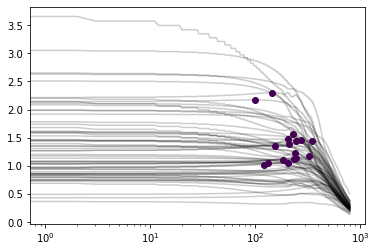

In [9]:
peaks = []
peak_dict = []
for i in np.arange(y.shape[0]):
    peak,prop = signal.find_peaks(y[i,x_log_id], width=60, distance=15, height=1)
    peak_i,_ = signal.find_peaks(y[i,:], width=100, distance=5)
    plt.plot(y[i,x_log_id], c='k', alpha=0.2)
    #plt.scatter(x[peak],y[i,peak], c='r',zorder=0)
    
    if peak.shape[0] > 0:
        plt.scatter(np.nanmean(peak), np.nanmean(y[i,x_log_id[peak]]), c=label[i], zorder=99)
        peaks.append(np.nanmean(x_log[peak]).tolist())
        #print(prop)
    else:
        peaks.append(0)
plt.xscale('log')

In [10]:
peaks = np.ravel(peaks)
print(peaks)

[0.         0.         0.         0.         0.         0.
 0.         1.27573134 1.01282822 0.         0.         2.16612526
 1.76422361 0.         0.         1.29903211 0.         1.44805099
 0.9085981  1.50823961 1.15485003 0.         0.         1.52885338
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.96801958 0.         0.78256671 0.
 0.         1.25853045 0.         0.         0.         2.414613
 0.         0.         0.         0.         0.         1.42207726
 0.         0.         0.         0.         0.         1.46784213
 0.         0.         0.         0.86840072]


(array([47.,  0.,  0.,  3.,  3.,  5.,  3.,  1.,  1.,  1.]),
 array([0.       , 0.2414613, 0.4829226, 0.7243839, 0.9658452, 1.2073065,
        1.4487678, 1.6902291, 1.9316904, 2.1731517, 2.414613 ]),
 <BarContainer object of 10 artists>)

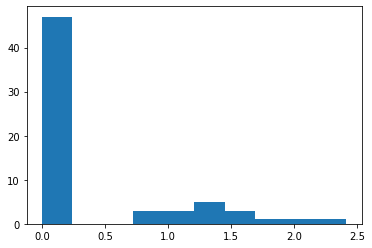

In [11]:
plt.hist(peaks)

[-1  0  1  2  3]


C:\Users\SMest\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


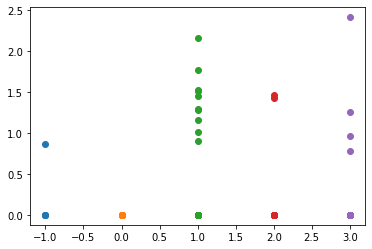

In [12]:
uniq = np.unique(label).astype(np.int)
print(uniq)
means = []
for i in uniq:
    means.append(peaks[label==i])
    plt.scatter(np.full(len(peaks[label==i]), i), peaks[label==i])


In [13]:
np.savetxt("peaks.csv",np.vstack((label,peaks)), delimiter=',', fmt='%.8f')